/home/joan/miniconda3/envs/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/joan/miniconda3/envs/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/joan/miniconda3/envs/jupyter-env/lib/python3.11/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.2.2 when usin

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Speed'),
  Text(1, 0, 'BufferCount'),
  Text(2, 0, 'DayTime'),
  Text(3, 0, 'SpeedDiff+1'),
  Text(4, 0, 'SpeedDiff-1'),
  Text(5, 0, 'Course'),
  Text(6, 0, 'CourseDiff')])

Text(0.5, 1.0, 'Multiclass model')

Text(0.5, 0, 'Model features')

Text(0, 0.5, 'Absolute shap values')

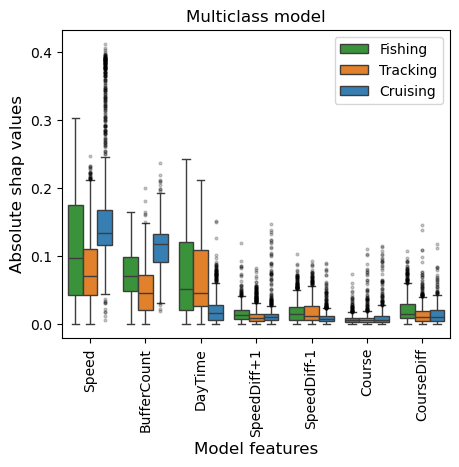

In [6]:
import joblib
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#CHOOSE THE MODEL EVALUATED
modelRunning = 'binaryModel'
modelRunning = 'multiClassModel'

#1. Get fitted model
MLmodel = joblib.load('results/' + modelRunning + '/fittedModel_' + modelRunning +'.pkl')

#2. Extract shap values
x_train = pd.read_csv('data/' + modelRunning + '/x_train.csv')
explainer = shap.TreeExplainer(MLmodel.best_estimator_)
shap_values = explainer(x_train) #for categorical response variable there are two sets of shap values (660obs x 7features each). I guess one for each label(?)

beautyfullFeatureNames = ['Speed', 'Course', 'CourseDiff', 'SpeedDiff+1','SpeedDiff-1',
                 'DayTime','BufferCount']
shap_values.feature_names = beautyfullFeatureNames

#3. Transpose matrix for boxplot
if modelRunning == 'multiClassModel':
    shap0df = pd.DataFrame(data=np.abs(shap_values.values[:,:,0]),
                columns=shap_values.feature_names)
    shap1df = pd.DataFrame(data=np.abs(shap_values.values[:,:,1]),
                columns=shap_values.feature_names)
    shap2df = pd.DataFrame(data=np.abs(shap_values.values[:,:,2]),
                columns=shap_values.feature_names)
    
    shapDfDict = {'Fishing':shap1df,'Tracking':shap0df,  'Cruising':shap2df}
    hue_order_plot = ['Fishing', 'Tracking', 'Cruising'] #I define this variable here to reduce code afterwards
    colorDict = {'Cruising':'#2283C8', 'Tracking':'#ff7f0e', 'Fishing':'#2ca02c'}
    title = 'Multiclass model'
    

if modelRunning == 'binaryModel':
    shap0df = pd.DataFrame(data=np.abs(shap_values.values[:,:,0]),
                columns=shap_values.feature_names)
    shap1df = pd.DataFrame(data=np.abs(shap_values.values[:,:,1]),
                columns=shap_values.feature_names)
    shapDfDict = {'Tracking-Cruising':shap0df, 'Fishing':shap1df}
    hue_order_plot = ['Fishing', 'Tracking-Cruising'] #I define this variable here to reduce code afterwards
    colorDict = {'Fishing':'#2ca02c', 'Tracking-Cruising':'#C82937'}
    title = 'Binary model'

transposedShap = {}
for shapDf in shapDfDict:
    df_dict = {}
    for feature in shap_values.feature_names:
        shapDfDict[shapDf]['Operation'] = shapDf
        shapDfDict[shapDf]['Feature'] = 'holi'
        df = shapDfDict[shapDf][[feature, 'Feature', 'Operation']].copy()
        df['Feature'] = feature
        df = df.rename(columns={feature:'Shap'})
        #add variable value for scatterplots?
        df_dict[feature] = df
    transposedShap[shapDf] = pd.concat(df_dict.values())
shapFinalDF = pd.concat(transposedShap.values())

#4. Boxplot
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.boxplot(data=shapFinalDF, x='Feature', y='Shap', hue='Operation',
            order=['Speed', 'BufferCount', 'DayTime', 'SpeedDiff+1', 'SpeedDiff-1', 
                    'Course', 'CourseDiff'],
            hue_order=hue_order_plot,
            palette = colorDict,
            flierprops = dict(markersize=2, alpha=0.2, markerfacecolor='black', markeredgecolor=None)
            )
plt.xticks(rotation=90)
plt.title(title)
ax.set_xlabel("Model features",fontsize=12)
ax.set_ylabel("Absolute shap values",fontsize=12)
ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4])
ax.legend_.set_title(None)
plt.savefig('results/' + modelRunning + '/shapValues/shapBoxplot.png', bbox_inches='tight', dpi=300)

In [8]:
pal = sns.color_palette()
pal
print(pal.as_hex())
colorDict = {'N':'#1f77b4', 'A':'#ff7f0e', 'C':'#2ca02c', 'AN':'#d62728'}

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


'Speed'

'BufferCount'

'DayTime'

Text(0, 0.5, 'Shap value')

Text(0, 0.5, '')

Text(0, 0.5, '')

Text(0.5, 0, 'Speed')

Text(0.5, 0, 'Buffer count')

Text(0.5, 0, 'Day time')

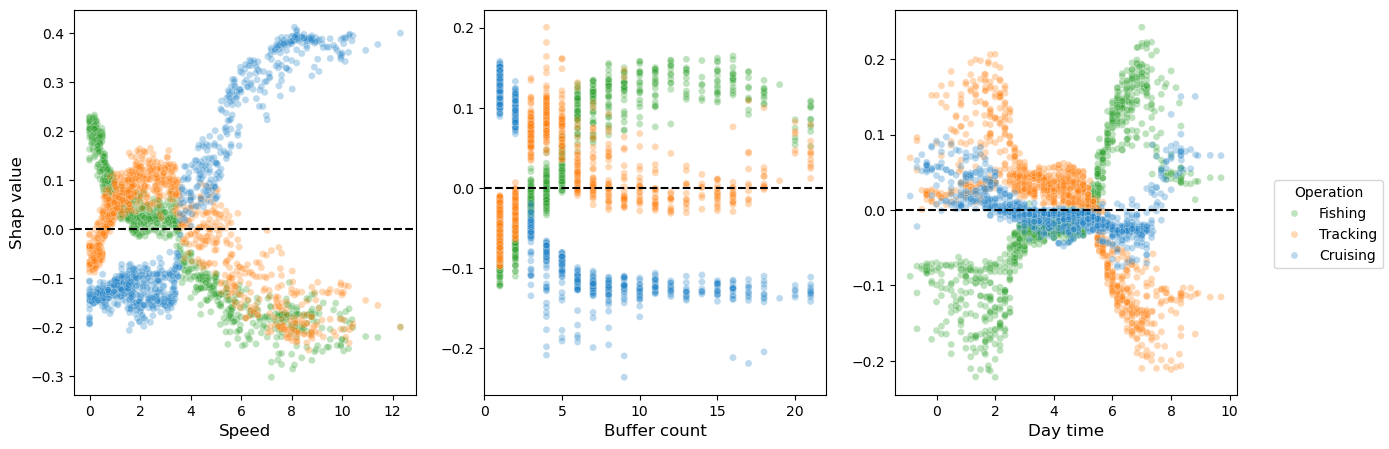

In [38]:
#5. Scatterplots
features = ['Speed', 'BufferCount', 'DayTime']
if modelRunning == 'binaryModel':
    for feature in features:
        feature
        shapAN = shap_values[:,feature,0].values
        ANdata = shap_values[:,feature,0].data
        shapC = shap_values[:,feature,1].values
        Cdata = shap_values[:,feature,1].data

        shapScatterDF = pd.concat([pd.DataFrame({'VessOp':'C', 'shapValue':shapC, feature:Cdata}),
                                   pd.DataFrame({'VessOp':'AN', 'shapValue':shapAN, feature:ANdata})])
        if feature == 'DayTime':
            shapScatterDF['DayTime'] = shapScatterDF['DayTime']-12
        fig, ax = plt.subplots(figsize=(6,6))
        sns.scatterplot(shapScatterDF, x=feature, y='shapValue', hue='VessOp', alpha=0.5)
        plt.axhline(y=0, linestyle='--', color='black')
        plt.legend(title='Operation')
        #sns.regplot(shapScatterDF.loc[shapScatterDF['VessOp'] =='AN'], x=feature, y='shapValue', order=3, line_kws=dict(color="orange"), scatter=False)
        #sns.regplot(shapScatterDF.loc[shapScatterDF['VessOp'] =='C'], x=feature, y='shapValue', order=3, line_kws=dict(color="blue"), scatter=False)
        ax.set_ylabel("Shap values",fontsize=12)
        fig.savefig('results/'+ modelRunning + '/shapValues/scatterplot_' + feature + '.png', bbox_inches='tight')
        

if modelRunning == 'multiClassModel':
    for feature in features:
        feature
        shapA = shap_values[:,feature,0].values
        Adata = shap_values[:,feature,0].data
        shapC = shap_values[:,feature,1].values
        Cdata = shap_values[:,feature,1].data
        shapN = shap_values[:,feature,2].values
        Ndata = shap_values[:,feature,2].data

        shapScatterDF = pd.concat([pd.DataFrame({'VessOp':'Fishing', 'shapValue':shapC, feature:Cdata}),
                                   pd.DataFrame({'VessOp':'Tracking', 'shapValue':shapA, feature:Adata}),
                                   pd.DataFrame({'VessOp':'Cruising', 'shapValue':shapN, feature:Ndata})])
        dfName = feature + 'df' 
        if feature == 'Speed': speedDF = shapScatterDF
        if feature == 'BufferCount': bufferCountDF = shapScatterDF
        if feature == 'DayTime':
            shapScatterDF['DayTime'] = shapScatterDF['DayTime']-12
            dayTimeDF = shapScatterDF
    
    colormapping = dict(Fishing='#2ca02c', Tracking='#ff7f0e', Cruising='#2283C8')
    fig, axes = plt.subplots(1,3, figsize=(15,5))
    sns.scatterplot(ax = axes[0], x=speedDF.Speed, y=speedDF.shapValue, hue=speedDF.VessOp, palette=colormapping, alpha=0.3, s=25).axhline(y=0, linestyle='--', color='black')
    sns.scatterplot(ax = axes[1], x=bufferCountDF.BufferCount, y=bufferCountDF.shapValue, palette=colormapping, hue=bufferCountDF.VessOp, alpha=0.3, s=25).axhline(y=0, linestyle='--', color='black')
    sns.scatterplot(ax = axes[2], x=dayTimeDF.DayTime, y=dayTimeDF.shapValue, hue=dayTimeDF.VessOp, palette=colormapping, alpha=0.3, s=25).axhline(y=0, linestyle='--', color='black')
    
    for axNum in range(0,3): 
        axes[axNum].get_legend().remove()
        if axNum==0: axes[axNum].set_ylabel('Shap value', fontsize=12)
        else: axes[axNum].set_ylabel('')

    axes[0].set_xlabel('Speed', fontsize=12)
    axes[1].set_xlabel('Buffer count', fontsize=12)
    axes[2].set_xlabel('Day time', fontsize=12)

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='center right', title='Operation')
    fig.savefig('results/'+ modelRunning + '/shapValues/scatterplot.png', bbox_inches='tight')
